<a href="https://colab.research.google.com/github/jchen8000/GenerativeAI/blob/main/Positional_Encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3.3 Positional Encoding


### Sine and Cosine Functions

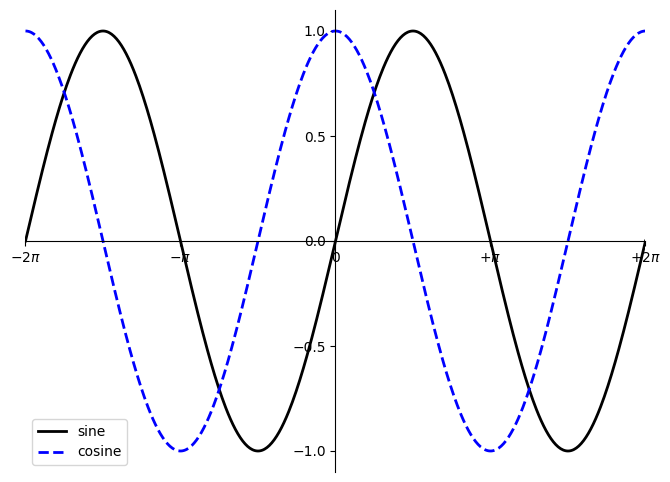

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x=np.linspace(-2*np.pi,2*np.pi,512,endpoint=True)
cos,sin = np.cos(x), np.sin(x)
plt.figure(figsize=(8, 6))
plt.plot(x, sin, color='k', lw='2.0', ls='-', label='sine')
plt.plot(x, cos, color='b', lw='2.0', ls='--', label='cosine')
plt.xlim(-2*np.pi, 2*np.pi)
plt.ylim(-1.1, 1.1)
plt.xticks([-2*np.pi,-np.pi,0,np.pi,2*np.pi],[r'$-2\pi$', r'$-\pi$', r'$0$', r'$+\pi$', r'$+2\pi$'])
plt.yticks([-1,-0.5,0,0.5,1])
ax=plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))
plt.legend()
plt.savefig("sine_cosine.svg", format="svg", transparent=True, bbox_inches='tight')
plt.show()

### Positional Encoding

Based on the paper [Attention Is All You Need](https://arxiv.org/pdf/1706.03762.pdf), Positional Encoding is defined as:

$PE_{(pos, 2i)}=\sin{\left( \frac{pos}{10000^{2i/d_{model}}} \right)}$

$PE_{pos, 2i+1}=\cos{\left( \frac{pos}{10000^{2i/d_{model}}} \right)}$

where:

$pos$: is the position of an item in the input sequence, $0 \leqslant  pos \lt  \frac{len(input)}{2}$

$d_{model}$: Dimension of the embedding space

In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import math

class PositionalEncoding(nn.Module):
  def __init__(self, d_model, max_len):
    super(PositionalEncoding, self).__init__()
    self.encoding = torch.zeros(max_len, d_model)
    position = torch.arange(0, max_len).unsqueeze(1).float()
    div_term = torch.exp(torch.arange(0, d_model, 2).float() *
                         -(math.log(10000.0) / d_model))
    self.encoding[:, 0::2] = torch.sin(position * div_term)
    self.encoding[:, 1::2] = torch.cos(position * div_term)
    self.encoding = self.encoding.unsqueeze(0)

  def forward(self, x):
    return x + self.encoding[:, :x.size(1)].detach()


In [3]:
d_model = 512  # Dimension of the model
max_len = 100  # Maximum sequence length

input = torch.zeros([1,max_len,d_model])
positional_encoding = PositionalEncoding(d_model, max_len)
encoded_sequence = positional_encoding(input)


<Figure size 800x600 with 0 Axes>

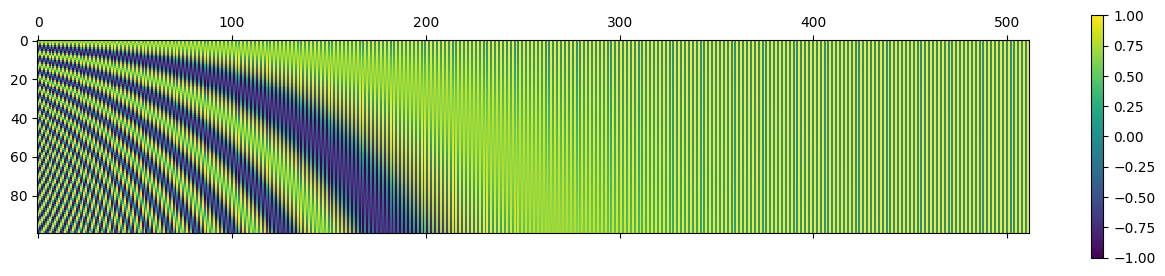

In [24]:
plt.figure(figsize=(8, 6))
cax = plt.matshow(encoded_sequence[0].numpy())
plt.gcf().colorbar(cax)
plt.savefig("pos_enc_wavelength3.svg", format="svg", transparent=True, bbox_inches='tight')

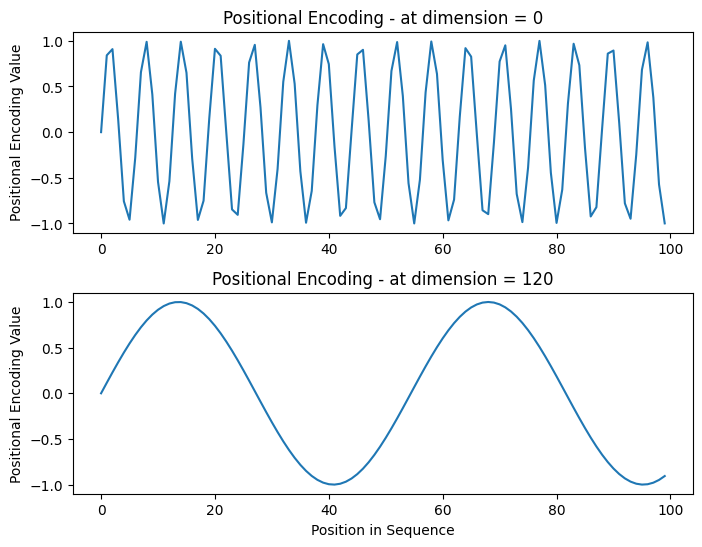

In [23]:
# Visualize the positional encoding for a given dimension
plt.figure(figsize=(8, 6))

dim = 0
plt.subplot(2, 1, 1)
plt.plot(encoded_sequence[0, :, dim].numpy())
plt.title('Positional Encoding - at dimension = %d' % dim)
plt.ylabel('Positional Encoding Value')

dim = 120
plt.subplot(2, 1, 2)
plt.plot(encoded_sequence[0, :, dim].numpy())
plt.title('Positional Encoding - at dimension = %d' % dim)
plt.ylabel('Positional Encoding Value')
plt.xlabel('Position in Sequence')

plt.subplots_adjust(hspace=0.3)
plt.savefig("pos_enc_wavelength2.svg", format="svg", transparent=True, bbox_inches='tight')
plt.show()

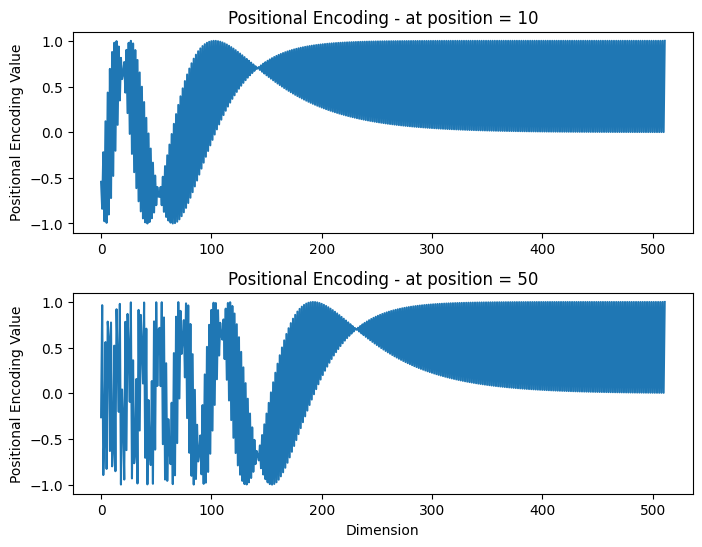

In [29]:
# Visualize the positional encoding for a given position
plt.figure(figsize=(8, 6))

pos = 10
plt.subplot(2, 1, 1)
plt.plot(encoded_sequence[0, pos, :].numpy())
plt.title('Positional Encoding - at position = %d' % pos)
plt.ylabel('Positional Encoding Value')

pos = 50
plt.subplot(2, 1, 2)
plt.plot(encoded_sequence[0, pos, :].numpy())
plt.title('Positional Encoding - at position = %d' % pos)
plt.ylabel('Positional Encoding Value')
plt.xlabel('Dimension')

plt.subplots_adjust(hspace=0.3)
plt.savefig("pos_enc_wavelength4.svg", format="svg", transparent=True, bbox_inches='tight')
plt.show()